In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate the signal composed of sinusoids at specified frequencies
fs = 500.0  # Sampling rate in Hz
t = np.linspace(0, 2, int(fs), False)  # 2 second
frequencies = [45, 60, 100, 160]  # Frequencies in Hz
sig = np.sum([np.sin(2*np.pi*f*t) for f in frequencies], axis=0)


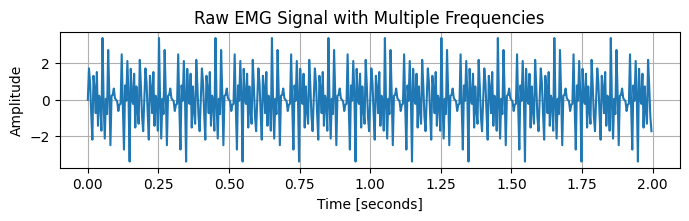

In [3]:
# Plot the original signal
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.title('Raw EMG Signal with Multiple Frequencies')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid(True)

In [4]:
# Design the bandpass filter
sos = signal.butter(4, [74.5, 149.5], 'bandpass', fs=fs, output='sos')

In [5]:
# Apply the bandpass filter
filtered_sig = signal.sosfilt(sos, sig)

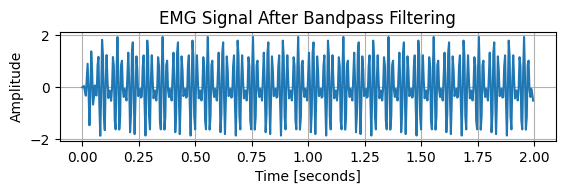

In [9]:
# Plot the signal after applying the bandpass filter
plt.subplot(3, 1, 2)
plt.plot(t, filtered_sig)
plt.title('EMG Signal After Bandpass Filtering')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid(True)

C:\Users\rajde\AppData\Local\Temp\ipykernel_30608\2417971403.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)))


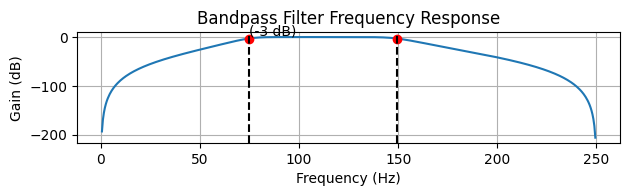

In [8]:
# Plot the frequency response of the filter
plt.subplot(3, 1, 3)
w, h = signal.sosfreqz(sos, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid(True)

# Add -3 dB cutoff point
cutoff_freq = [74.5, 149.5]
cutoff_response = -3 * np.ones_like(cutoff_freq)
plt.plot(cutoff_freq, cutoff_response, 'ro')
plt.text(cutoff_freq[0], -3, '(-3 dB)', verticalalignment='bottom')

# Add vertical lines penetrating the x-axis
plt.axvline(x=cutoff_freq[0], color='black', linestyle='--')
plt.axvline(x=cutoff_freq[1], color='black', linestyle='--')

plt.tight_layout()
plt.show()